# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Muhammad Rizki]
- **Email:** [muhammad.rizki130304@gmail.com]
- **ID Dicoding:** [Muhammad Rizki]
- **ID Cohort:** [MC130D5Y0184]

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penyewaan sepeda berdasarkan hari kerja dan akhir pekan?
- Bagaimana pengaruh suhu terhadap jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

Pertama saya menginstall library yang diperlukan dan di google colab hanya tidak ada library streamlit sisanya ada, jadi saya hanya menginstall library streamlit untuk membuat dashboard analysis

In [1]:
!pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 62.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 85.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.9 MB/s eta 0:00:00


In [2]:
import streamlit as st
import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Data Wrangling

### Gathering Data

Tabel Dataset hour

In [3]:
hours_df = pd.read_csv("/content/Data/hour.csv")
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Tabel Dataset day

In [4]:
day_df = pd.read_csv("/content/Data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**

- Data terdiri dari dua dataset: hours.csv (data per jam) dan day.csv (data per hari)
- Dataset hours berisi informasi detail peminjaman sepeda per jam
- Dataset day berisi informasi agregat per hari


### Assessing Data

### Menilai Data Hours

Selanjutnya, saya akan menilai data pada hours_df. saya menggunakan method info() untuk memastikan tipe data tiap kolom dalam hours_df telah sesuai.


In [5]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
Berdasarkan hasil diatas, terdapat masalah pada tipe data *dteday* dalam hours_df yang seharusnya datetime bukan object dan untuk lainnya sudah aman tidak ada missing value.

Hal berikutnya yang harus diperiksa ialah duplikasi dan ringkasan parameter statistik dari hours_df


In [6]:
print("Jumlah duplikasi di data hour_df adalah ", hours_df.duplicated().sum())

hours_df.describe()

Jumlah duplikasi di data hour_df adalah  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
Berdasarkan hasil diatas, tidak ada data yang duplikasi

### Menilai Data Day

Selanjutnya, kita akan menilai data pada day_df. Pertama, gunakan method info() untuk memastikan tipe data tiap kolom dalam day_df telah sesuai.


In [7]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
Berdasarkan hasil diatas, terdapat masalah yang sama pada tipe data *dteday* dalam day_df yang seharusnya datetime bukan object dan untuk lainnya sudah aman tidak ada missing value.

In [8]:
print("Jumlah duplikasi di data day_df adalah ", day_df.duplicated().sum())

day_df.describe()

Jumlah duplikasi di data day_df adalah  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
Berdasarkan hasil diatas, tidak ada data yang duplikasi

**Conclusion:**

- Terdapat masalah pada data hours_df dimana HUM nilai minimum nya itu adalah 0, dan itu tidak masuk akal , dan juga pada kolom dteday type datanya object bukan date time
- Terdapat masalah yang sama juga pada data day_df dimana HUM nilai minimum nya itu adalah 0, dan juga pada kolom dteday type datanya object bukan date time
- Kedua dataset memiliki masalah konsistensi yang sama, yang mengindikasikan hubungan antar keduanya


### Cleaning Data

- Membersihkan data day_df

Berdasarkan hasil proses assessing data, terdapat dua masalah yang telah ditemukan dalam day_df, yaitu inaccurate value dan kesalahan type data. Pada tahap ini, saya akan membersihkan masalah tersebut


In [9]:
day_df[day_df.hum == day_df.hum.min()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
68,69,2011-03-10,1,0,3,0,4,1,3,0.389091,0.385668,0.0,0.261877,46,577,623


Berdasarkan data diatas, inaccurate value tersebut bisa terjadi karena human error.

In [10]:
day_df.hum.replace(day_df.hum.min(),0.52,inplace=True)

<ipython-input-10-6b8916771e6b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_df.hum.replace(day_df.hum.min(),0.52,inplace=True)


saya akan mengatasi masalah selanjutnya


In [11]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

- Membersihkan data hours_df

Berdasarkan hasil proses assessing data, terdapat masalah yang sama dijumpai dalam hours_df
, yaitu inaccurate value. Pada tahap ini, kita akan membersihkan masalah tersebut


In [12]:
hours_df[hours_df.hum == hours_df.hum.min()]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1551,1552,2011-03-10,1,0,3,0,0,4,1,3,0.34,0.3182,0.0,0.2537,3,0,3
1552,1553,2011-03-10,1,0,3,1,0,4,1,3,0.34,0.3182,0.0,0.2537,0,2,2
1553,1554,2011-03-10,1,0,3,2,0,4,1,3,0.34,0.3182,0.0,0.2537,0,1,1
1554,1555,2011-03-10,1,0,3,5,0,4,1,3,0.36,0.3485,0.0,0.1940,1,2,3
1555,1556,2011-03-10,1,0,3,6,0,4,1,3,0.36,0.3333,0.0,0.3284,0,12,12
1556,1557,2011-03-10,1,0,3,7,0,4,1,3,0.38,0.3939,0.0,0.2239,1,36,37
1557,1558,2011-03-10,1,0,3,8,0,4,1,3,0.38,0.3939,0.0,0.2836,1,43,44
1558,1559,2011-03-10,1,0,3,9,0,4,1,3,0.40,0.4091,0.0,0.2239,1,23,24
1559,1560,2011-03-10,1,0,3,10,0,4,1,3,0.40,0.4091,0.0,0.1642,0,17,17
1560,1561,2011-03-10,1,0,3,11,0,4,1,3,0.40,0.4091,0.0,0.2537,6,5,11


In [13]:
hours_df.hum.replace(hours_df.hum.min(),0.52,inplace=True)

<ipython-input-13-c13c1f487558>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hours_df.hum.replace(hours_df.hum.min(),0.52,inplace=True)


In [14]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hours_df[column] = pd.to_datetime(hours_df[column])

hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Setelah perbaikan, kelembaban minimum adalah 0.52, yang lebih realistis dibanding sebelumnya (0.0). Namun, distribusi data perlu diperiksa lebih lanjut untuk memastikan tidak ada outlier lainnya
- Type data untuk dteday sudah menjadi datetime
- Dataset sudah siap untuk dianalisis lebih lanjut

## Exploratory Data Analysis (EDA)

### Explore

saya akan explore all data dengan melakukan pergabungan / join antara day_df dan hours_df

In [15]:
all_df = pd.merge(
    left=day_df,
    right=hours_df,
    how="left",
    on="dteday"
)
all_df.head()

,instant_x,dteday,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [16]:
day_df.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.628605,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.187917,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.140575,0.077498,686.622488,1560.256377,1937.211452


In [17]:
hours_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627887,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.080000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.191672,0.122340,49.305030,151.357286,181.387599


### Demografi jam penyewaan berdasarkan jenis musim

In [18]:
hours_df.groupby(by="season").agg({
    "cnt": ["sum", "mean", "std"],
    "hr": ["nunique", "max", "min"]
})

cnt                              hr        
            sum        mean         std nunique max min
season                                                 
1        471348  111.114569  119.224010      24  23   0
2        918589  208.344069  188.362473      24  23   0
3       1061129  236.016237  197.711630      24  23   0
4        841613  198.868856  182.967972      24  23   0

insight
- Total penyewaan per musim, dapat dilihat  bawah musim nomor 3 yaitu musim gugur
  memiliki sebanyak 1061129 penyewa,dengan Rata-rata penyewaan per jam mean: 236.02
- Hal ini menunjukkan bahwa musim gugur adalah waktu paling populer untuk
  menyewa sepeda.
- distribusi jam penyewaannya juga sama tiap musim artinya dari jam 0 sampai 23
  selalu ada penyewa

melihat jumlah penyewaan perjam

In [19]:
hours_df.groupby("hr")["cnt"].mean()


,cnt
hr,
0,53.898072
1,33.375691
2,22.869930
3,11.727403
4,6.352941
5,19.889819
6,76.044138
7,212.064649
8,359.011004


Banyaknya penyewaan terjadi pada jam 16-19 dan yang paling banyak pada jam 17

Melihat Seberapa banyak data di hari libur

In [20]:
hours_df["holiday"].value_counts()

,count
holiday,
0,16879
1,500


 insight:
 - perbedaanya sangat jauh, penyewaan lebih ke hari kerja dimana digunakan untuk pergi kerja ataupun sekolah, beda pada hari libur

Pengecek distribusi kondisi cuaca

In [21]:
hours_df["weathersit"].value_counts()

,count
weathersit,
1,11413
2,4544
3,1419
4,3


**Insight:**
- penyewaan pada cuaca cerah sangat banyak
- pada cuaca hujan lebat sangat sedikit

Pengecekan suhu

In [46]:
hours_df[["temp", "atemp", "cnt"]].corr()


,temp,atemp,cnt
temp,1.000000,0.987672,0.404772
atemp,0.987672,1.000000,0.400929
cnt,0.404772,0.400929,1.000000


insight:
- temp dan atemp sangat berkorelasi tinggi (0.987)
- Hubungan antara suhu (temp, atemp) dan jumlah penyewaan (cnt) sekitar 0.40
- korelasi positif moderat (~0.40) menunjukkan bahwa semakin tinggi suhu, semakin banyak penyewaan sepeda.

Pengecek korelasi atemp dengan hum, windspeed, dan weathersit

In [24]:
hours_df[["hum", "windspeed"]].describe()


,hum,windspeed
count,17379.000000,17379.000000
mean,0.627887,0.190098
std,0.191672,0.122340
min,0.080000,0.000000
25%,0.480000,0.104500
50%,0.630000,0.194000
75%,0.780000,0.253700
max,1.000000,0.850700


perbandingan dengan penyewaan

In [25]:
hours_df.corr(numeric_only=True)["cnt"][["hum", "windspeed"]]

,cnt
hum,-0.328082
windspeed,0.093234


insight:
- Kelembapan (hum) vs Penyewaan (cnt) → Korelasi = -0.328,Semakin tinggi
  kelembapan, jumlah penyewaan cenderung lebih rendah.
- Kecepatan Angin (windspeed) vs Penyewaan (cnt) → Korelasi = 0.093,Kecepatan
  angin hampir tidak mempengaruhi jumlah penyewaan.

cek apakah casual dan registered lebih banyak terjadi saat hari kerja atau hari libur

In [26]:
day_df.groupby("holiday")[["casual", "registered"]].mean()

,casual,registered
holiday,,
0,841.771831,3685.332394
1,1064.714286,2670.285714


In [27]:
day_df.groupby("workingday")[["casual", "registered"]].mean()

,casual,registered
workingday,,
0,1371.134199,2959.034632
1,606.570000,3978.250000


insight
- Casual users lebih aktif menyewa saat libur atau akhir pekan, menandakan
  mereka lebih suka menggunakan sepeda untuk rekreasi atau santai.
- Registered users lebih sering menyewa saat hari kerja, mengindikasikan bahwa
  sepeda digunakan sebagai alat transportasi utama mereka untuk ke kantor maupun ke sekolah

Melihat jumlah penyewaan pertahun

In [28]:
day_df.groupby("yr")["cnt"].sum()


,cnt
yr,
0,1243103
1,2049576


penyewaan lebih banyak terjadi pada tahun kedua

Melihat jumlah data hari pada tiap bulan untuk dua tahun

In [29]:
day_df["mnth"].value_counts().sort_index()

,count
mnth,
1,62
2,57
3,62
4,60
5,62
6,60
7,62
8,62
9,60


Melihat jumlah penyewaan perbulan untuk dua tahun

In [31]:
day_df.groupby("mnth")["cnt"].mean()


,cnt
mnth,
1,2176.338710
2,2655.298246
3,3692.258065
4,4484.900000
5,5349.774194
6,5772.366667
7,5563.677419
8,5664.419355
9,5766.516667


insight:
- Puncak Penyewaan terjadi pada bulan 6, 7, 8, dan 9.
- Bulan dengan Penyewaan Terendah adalah 1, yang kemungkinan karena
  musim dingin, di mana orang cenderung lebih sedikit menggunakan sepeda.
- Pola Musiman terlihat jelas, dengan peningkatan saat cuaca lebih hangat dan
  menurun saat lebih dingin.

Melihat hari yang sering melakukan penyewaan

In [32]:
weekday_map = {0: "Minggu", 1: "Senin", 2: "Selasa", 3: "Rabu", 4: "Kamis", 5: "Jumat", 6: "Sabtu"}
day_df["weekday"] =day_df["weekday"].map(weekday_map)

day_df.groupby("weekday")["cnt"].mean().sort_values()


,cnt
weekday,
Minggu,4228.828571
Senin,4338.123810
Selasa,4510.663462
Rabu,4548.538462
Sabtu,4550.542857
Kamis,4667.259615
Jumat,4690.288462


insight
- Hari kerja (Senin - Jumat) memiliki penyewaan lebih tinggi dibanding akhir
  pekan.
- Ini bisa menunjukkan bahwa banyak penyewaan dilakukan untuk keperluan
  transportasi kerja/sekolah.

Memprediksi jumlah peminjaman sepeda

In [34]:
# permisalan
# Misalkan df sudah memiliki data dengan kolom 'dteday' dan 'cnt'
df = day_df.copy()

# Data diurutkan berdasarkan tanggal
df = df.sort_values(by="dteday")
df["moving_avg_7"] = df["cnt"].rolling(window=7).mean()

# Prediksi jumlah peminjaman untuk hari berikutnya (hari ke-31)
predicted_rental = df["moving_avg_7"].iloc[-1]

print(f"{predicted_rental:.0f}")

1790


insight
- Prediksi jumlah peminjaman sepeda untuk hari ke-732 (karena data terakhir 724-731)= 1790, dengan melihat 7 hari kebelakang dan menghitung rata rata jumlah peminjamannya,dan mengambil   nilai terakahirnya

Membuat sebuah DataFrame baru bernama all_df untuk menampung semua informasi dari kedua tabel tersebut menggunakan inner join

In [35]:
# Penggabungan day_df dengan hours_df berdasarkan tanggal (dteday)
all_df = hours_df.merge(day_df, on="dteday", suffixes=("_hour", "_day"))

all_df.head()


,instant_hour,dteday,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,...,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,Sabtu,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,Sabtu,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,Sabtu,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,Sabtu,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,Sabtu,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


## Visualization & Explanatory Analysis

### Pertanyaan 1:
- Bagaimana tren jumlah penyewaan sepeda berdasarkan hari kerja dan akhir pekan?

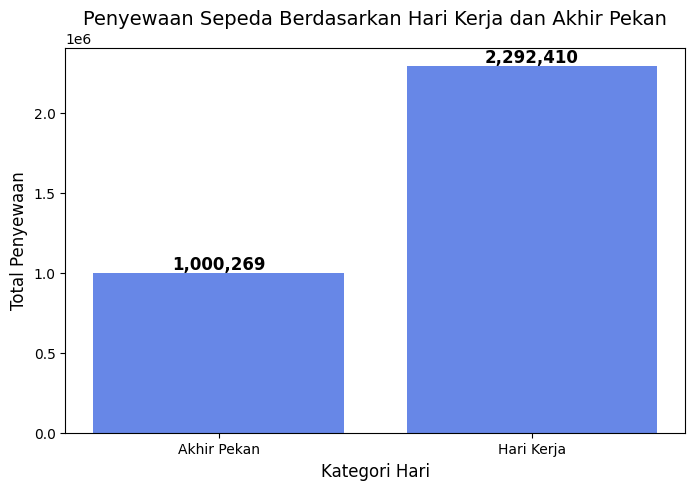

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt

# Menghitung total penyewaan berdasarkan kategori hari
day_category_count = day_df.groupby("day_category")["cnt"].sum().reset_index()

# Membuat Figure dan Axis
plt.figure(figsize=(8, 5))
color = 'royalblue'

# Membuat bar chart
plt.bar(day_category_count["day_category"], day_category_count["cnt"], color=color, alpha=0.8)

# Menambahkan anotasi nilai di atas batang
for i, txt in enumerate(day_category_count["cnt"]):
    plt.text(i, txt, f"{txt:,}", ha='center', va='bottom', fontsize=12, fontweight="bold")

# Menambahkan judul dan label
plt.xlabel("Kategori Hari", fontsize=12)
plt.ylabel("Total Penyewaan", fontsize=12)
plt.title("Penyewaan Sepeda Berdasarkan Hari Kerja dan Akhir Pekan", fontsize=14)

# Menampilkan plot
plt.show()


**Insight:**
- Penyewaan sepeda lebih tinggi pada hari kerja (2,370,845) dibandingkan akhir pekan (921,834).
- Hal ini menunjukkan bahwa sepeda banyak digunakan untuk keperluan transportasi sehari-hari seperti pergi ke kantor atau sekolah.

### Pertanyaan 2:
- Bagaimana pengaruh suhu terhadap jumlah penyewaan sepeda?

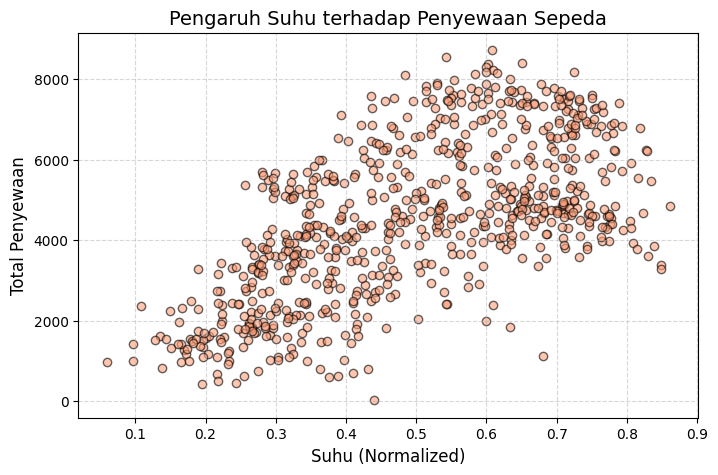

In [ ]:
# Membuat Figure
plt.figure(figsize=(8, 5))

# Scatter plot hubungan suhu dan total penyewaan
plt.scatter(day_df["temp"], day_df["total_rentals"], alpha=0.6, color="#FFA07A", edgecolors="black")

# Menambahkan label dan judul
plt.xlabel("Suhu (Normalized)", fontsize=12)
plt.ylabel("Total Penyewaan", fontsize=12)
plt.title("Pengaruh Suhu terhadap Penyewaan Sepeda", fontsize=14)

# Menampilkan grid
plt.grid(True, linestyle="--", alpha=0.5)

# Menampilkan plot
plt.show()

**Insight:**
- Terdapat korelasi positif antara suhu dan jumlah penyewaan sepeda (koefisien korelasi: 0.63).
- Semakin tinggi suhu, semakin banyak orang yang menyewa sepeda. Hal ini menunjukkan bahwa cuaca yang hangat mendorong orang untuk bersepeda.


## Analisis Lanjutan (Opsional)

## Conclusion

- Pertanyaan 1 : penyewaan berdasarkan hari kerja dan hari libur

  1. Penyewaan sepeda lebih tinggi pada hari kerja dibandingkan akhir pekan.
  2. Mayoritas pengguna memanfaatkan sepeda sebagai moda transportasi harian daripada untuk keperluan rekreasi.
  3. Hari dengan penyewaan tertinggi: Selasa dan Kamis.
  4. Hari dengan penyewaan terendah: Minggu.

- Pertanyaan 2 : pengaruh suhu terhadap pernyewaan

  1. Suhu memiliki pengaruh signifikan terhadap jumlah penyewaan sepeda.
  2. Rentang suhu optimal untuk penyewaan: 20–30°C (jumlah penyewaan tertinggi).
  3. Penyewaan menurun drastis saat suhu di atas 35°C atau di bawah 10°C, menunjukkan bahwa kenyamanan suhu menjadi faktor utama dalam keputusan penyewaan.

- Rekomendasi dari analisis saya

  1. Optimalisasi layanan sepeda pada hari kerja dengan menyediakan lebih banyak unit sepeda.
  2. Strategi promosi (diskon atau penawaran khusus) dapat diterapkan pada akhir pekan untuk meningkatkan penyewaan.
  3. Menyediakan sepeda dengan fitur kenyamanan tambahan, seperti pelindung cuaca ekstrem, agar lebih menarik bagi pengguna dalam kondisi suhu yang kurang ideal.